In [2]:
import os
import numpy as np
import pandas as pd
import dateutil.parser

In [3]:
ads_file = 'data/ad_table.csv'
df = pd.read_csv(ads_file, header=0, sep=',')
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [4]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [5]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,2015,10,1,3,274,40,4
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,2015,10,2,4,275,40,4
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,2015,10,3,5,276,40,4
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,2015,10,4,6,277,40,4
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,2015,10,5,0,278,41,4


In [6]:
df['date'].describe()

count                    2115
unique                     53
top       2015-11-20 00:00:00
freq                       40
first     2015-10-01 00:00:00
last      2015-11-22 00:00:00
Name: date, dtype: object

In [7]:
df.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue,year,month,day,dayofweek,dayofyear,weekofyear,quarter
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.0,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.0
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589,2015.0,10.414657,14.147518,3.113475,300.001891,43.698345,4.0
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757,0.0,0.492779,8.272556,1.989181,15.295388,2.193517,0.0
min,0.000000,0.000000,0.000000,0.000000,-200.150000,2015.0,10.000000,1.000000,0.000000,274.000000,40.000000,4.0
25%,28030.500000,744.000000,18.000000,0.760000,235.470000,2015.0,10.000000,7.000000,1.000000,287.000000,42.000000,4.0
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000,2015.0,10.000000,14.000000,3.000000,300.000000,44.000000,4.0
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000,2015.0,11.000000,20.000000,5.000000,313.000000,46.000000,4.0
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000,2015.0,11.000000,31.000000,6.000000,326.000000,47.000000,4.0


In [8]:
df.shape

(2115, 14)

In [9]:
df.dropna()
df.shape

(2115, 14)

In [10]:
df.drop_duplicates()
df.shape

(2115, 14)

In [11]:
df[df['total_revenue'] < 0]

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,year,month,day,dayofweek,dayofyear,weekofyear,quarter
1186,2015-10-25,50459,1904,97,0.89,-200.15,ad_group_23,2015,10,25,6,298,43,4
1404,2015-11-01,70145,584,15,0.36,-25.09,ad_group_27,2015,11,1,6,305,44,4
1524,2015-11-15,22070,1400,20,1.67,-3.56,ad_group_29,2015,11,15,6,319,46,4
2089,2015-10-28,80270,1151,41,0.96,-92.06,ad_group_40,2015,10,28,2,301,44,4


In [12]:
df[df['shown'] == 0]

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,year,month,day,dayofweek,dayofyear,weekofyear,quarter
204,2015-11-15,0,0,0,0.0,0.0,ad_group_4,2015,11,15,6,319,46,4
223,2015-10-12,0,0,0,0.0,0.0,ad_group_5,2015,10,12,0,285,42,4
554,2015-10-26,0,0,0,0.0,0.0,ad_group_11,2015,10,26,0,299,44,4
580,2015-11-21,0,0,0,0.0,0.0,ad_group_11,2015,11,21,5,325,47,4
632,2015-11-20,0,0,0,0.0,0.0,ad_group_12,2015,11,20,4,324,47,4
650,2015-10-16,0,0,0,0.0,0.0,ad_group_13,2015,10,16,4,289,42,4
676,2015-11-11,0,0,0,0.0,0.0,ad_group_13,2015,11,11,2,315,46,4
811,2015-10-19,0,0,0,0.0,0.0,ad_group_16,2015,10,19,0,292,43,4
821,2015-10-29,0,0,0,0.0,0.0,ad_group_16,2015,10,29,3,302,44,4
1000,2015-11-19,0,0,0,0.0,0.0,ad_group_19,2015,11,19,3,323,47,4


In [13]:
df[(df['shown'] == 0) & (df['total_revenue'] < 0)]

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,year,month,day,dayofweek,dayofyear,weekofyear,quarter


In [14]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

init_notebook_mode(connected=True)

#Get ad profit per day
def plot_ad_profit(df,ad_group):
    df_groupA = df[df.ad == ad_group]
    N = 100
    x = df_groupA.date
    y = df_groupA.total_revenue - (df_groupA.clicked * df_groupA.avg_cost_per_click)
    colors = np.random.rand(N)
    sz = np.random.rand(N)*30

    fig = go.Figure()
    fig.add_scatter(x=x,
                    y=y,
                    mode='markers',
                    marker={'size': sz,
                            'color': colors,
                            'opacity': 0.6,
                            'colorscale': 'Viridis'
                           });
    iplot(fig)

plot_ad_profit(df,'ad_group_2')

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode

init_notebook_mode(connected=True)

#Plot converted/clicked per day for multiple ad groups
def plot_clicked_converted(ad_groupA,ad_groupB,ad_groupC,ad_groupD,df):
    df_groupA = df[df.ad == ad_groupA]
    df_groupB = df[df.ad == ad_groupB]
    df_groupC = df[df.ad == ad_groupC]
    df_groupD = df[df.ad == ad_groupD]

    
    groupA = go.Scatter(
    x=df_groupA.date,
    y=(df_groupA.converted/df_groupA.clicked)*100,
    name = ad_groupA,
    mode = 'lines',
    )
    
    groupB = go.Scatter(
    x=df_groupB.date,
    y=(df_groupB.converted/df_groupB.clicked)*100,
    name = ad_groupB,
    mode = 'lines+markers',   
    )
    
    groupC = go.Scatter(
    x=df_groupC.date,
    y=(df_groupC.converted/df_groupC.clicked)*100,
    name = ad_groupC,
    mode = 'lines',
    )
    
    groupD = go.Scatter(
    x=df_groupD.date,
    y=(df_groupD.converted/df_groupD.clicked)*100,
    name = ad_groupD,
    mode = 'lines+markers',
    )
   
    data = [groupA,groupB,groupC,groupD]
    iplot(data)

    

plot_clicked_converted('ad_group_2','ad_group_5','ad_group_6','ad_group_10',df)

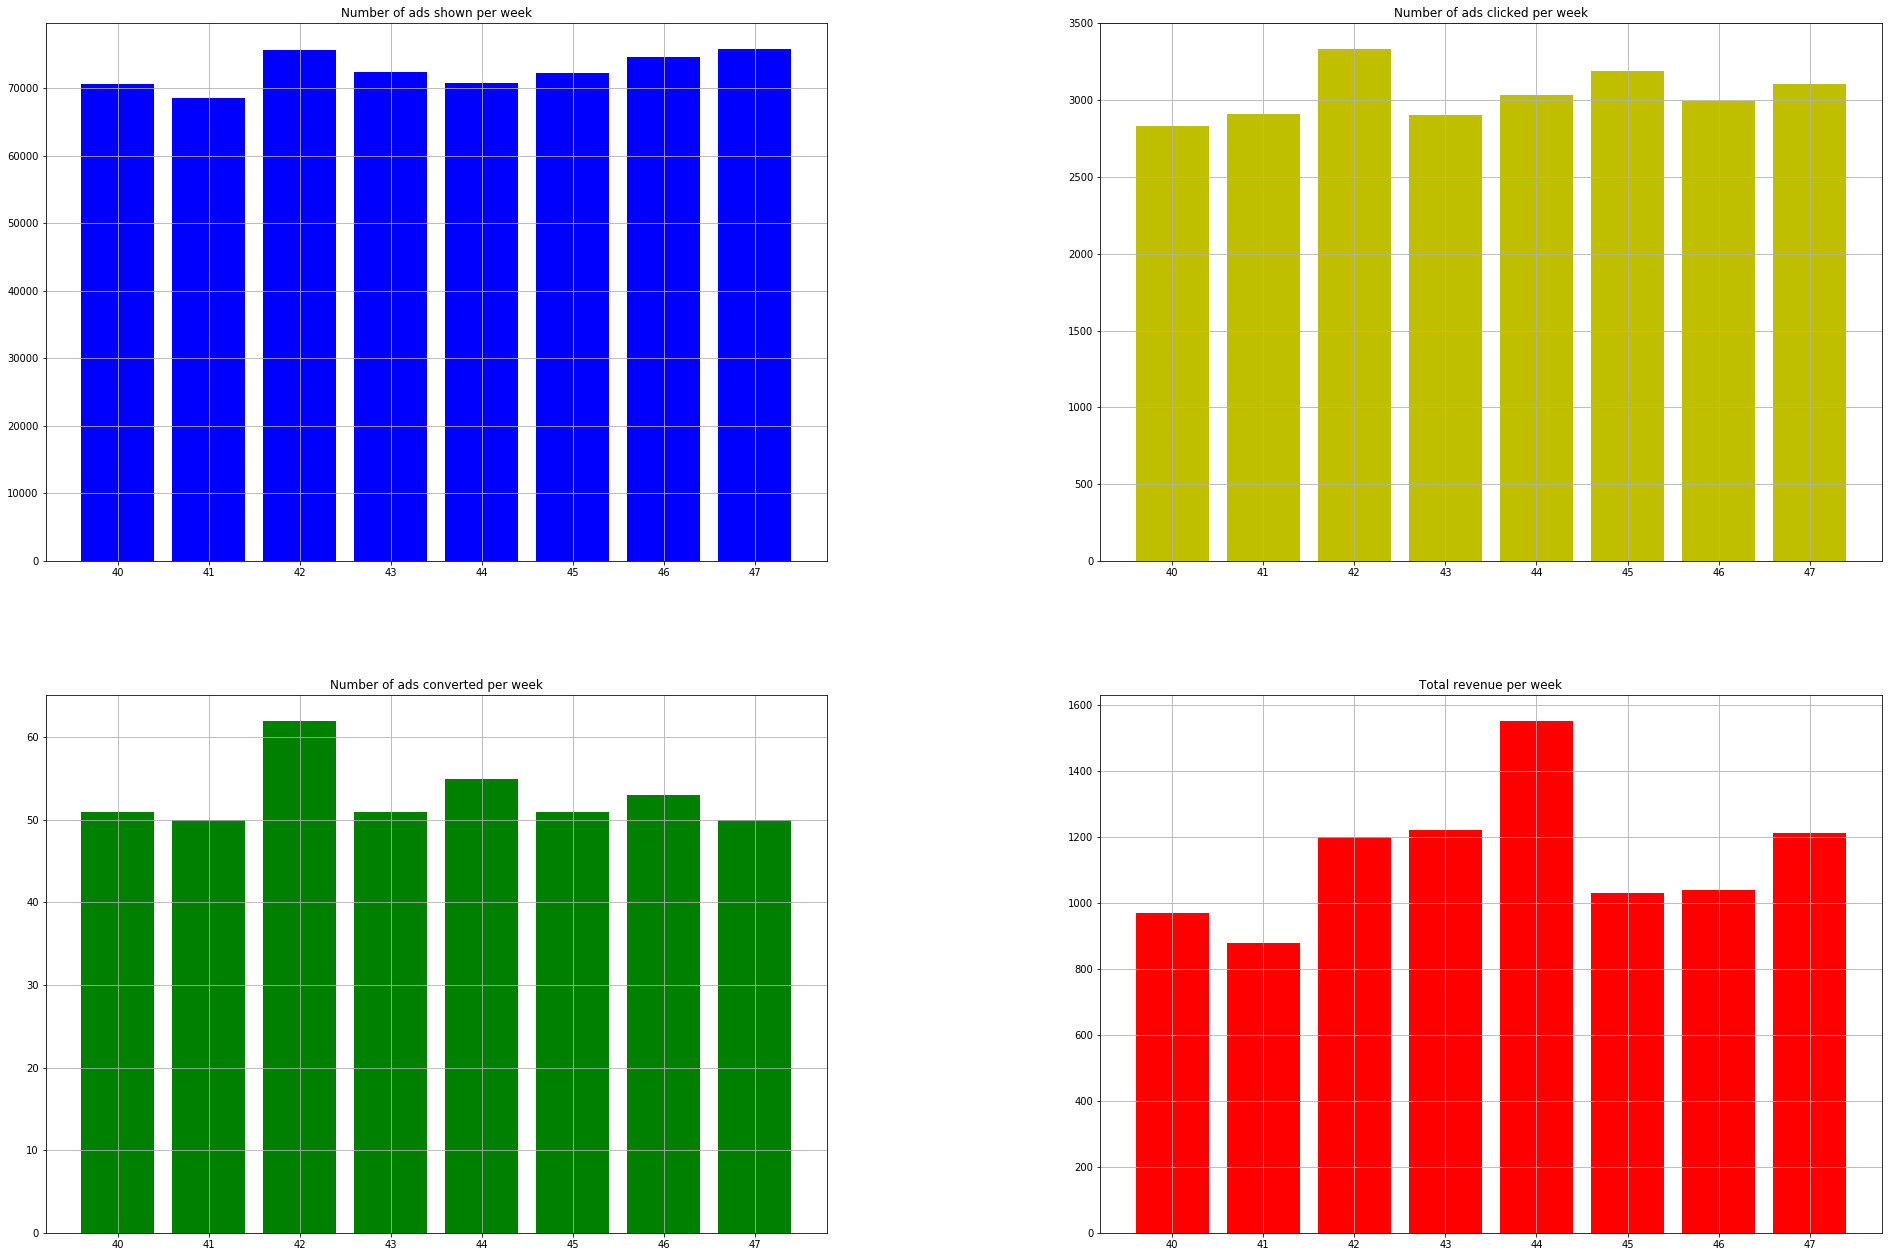

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ad_group(df,ad_group):
    
    #increase plot size
    plt.rcParams['figure.figsize']=(30,20)

    # plot with various axes scales
    plt.figure()

    df_groupA = df[df.ad == ad_group]

    # Number of ads shown per week
    plt.subplot(221)
    plt.bar(df_groupA.weekofyear, df_groupA.shown,color='b')
    plt.title('Number of ads shown per week')
    plt.grid(True)


    # Number of ads clicked per week
    plt.subplot(222)
    plt.bar(df_groupA.weekofyear, df_groupA.clicked,color='y')
    plt.title('Number of ads clicked per week')
    plt.grid(True)


    # Number of ads converted per week
    plt.subplot(223)
    plt.bar(df_groupA.weekofyear, df_groupA.converted,color='g')
    plt.title('Number of ads converted per week')
    plt.grid(True)

    # Total revenue per week
    plt.subplot(224)
    plt.bar(df_groupA.weekofyear, df_groupA.total_revenue,color='r')
    plt.title('Total revenue per week')
    plt.grid(True)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.35)

    plt.show()
    

plot_ad_group(df,'ad_group_1')
    

